<a href="https://colab.research.google.com/github/Amulyareddy2002/Sign-Language-Recognition/blob/master/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [2]:
pip install tensorflow==2.10.0 keras==2.10.0

In [3]:
!pip install PyDrive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.25.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.2 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 5.29.2 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.10.0 which is incompatible.


In [4]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
download = drive.CreateFile({'id': '1a4Xewe2ovbwyXu0i1uToyb1gRpUR5-J2'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [11]:
download = drive.CreateFile({'id': '1a0Rsh6vnIPiO6A7kzm6Z4xdplOjyCJCm'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [12]:
display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


None

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

In [14]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32')/255

In [15]:
display(train_Y)


,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [17]:

'''train_X = train_X.values.reshape(27455,784)
test_X = test_X.values.reshape(7172,784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)'''
train_X = train_X.values.reshape(train_X.shape[0],784)
test_X = test_X.values.reshape(test_X.shape[0],784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)

In [18]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [20]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0762 - accuracy: 0.9780
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9783
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0748 - accuracy: 0.9788
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9790
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9790
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0726 - accuracy: 0.9792
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9795
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9798
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9800
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

In [21]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9758
Accuracy:  0.9757999777793884


In [27]:
'''img = test_X[1]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
'''
img = test_X[1]
test_img = img.reshape((1,784))
# Use `predict` and `argmax` instead of `predict_classes`
img_class = np.argmax(model.predict(test_img), axis=-1)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

1/1 [==============================] - 0s 18ms/step
Class:  2


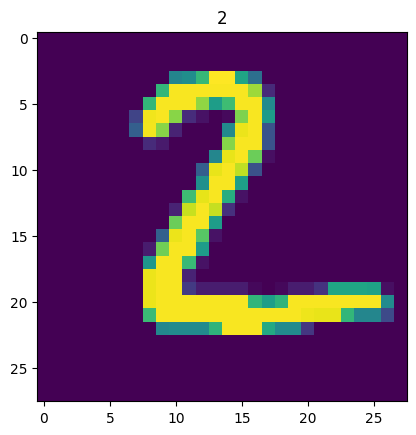

In [28]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()